In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
walmart_data_actual= pd.read_csv("/Users/nivzz/Downloads/Walmart_Store_sales.csv")

In [4]:
walmart_data=walmart_data_actual.copy()

In [5]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/10,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
#changing Date to one format
walmart_data['Date']=pd.to_datetime(walmart_data['Date'], utc=False)
#walmart_data['Date'] = pd.to_datetime(walmart_data.Date)
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null datetime64[ns]
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
walmart_data.corr() #Holiday_flag & store | Fuel_price & Holiday_flag (-)|

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


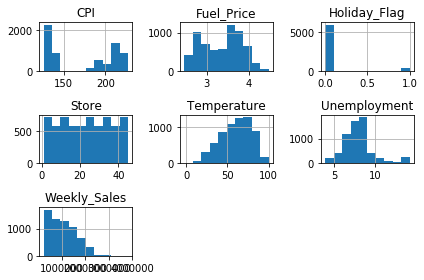

In [9]:
walmart_data.hist()
plt.tight_layout()

In [10]:
#checking all unique unemployment rate
unique_employment_index=walmart_data['Unemployment'].unique()

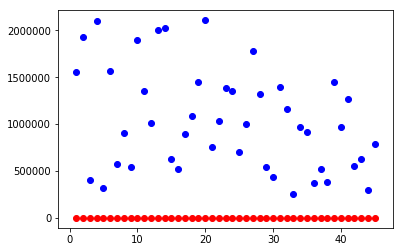

In [11]:
#Scatter plot between Unemployment vs Weekly Sales per store
y=walmart_data[['Unemployment']].groupby(walmart_data['Store'])['Unemployment'].median()
z=walmart_data.groupby(walmart_data['Store'])['Weekly_Sales'].mean()
x=range(1,46)
plt.scatter(x,y,c='r')
plt.scatter(x,z,c='b')

plt.show()

In [12]:
#Store that has maximum sale
Max_sale=walmart_data.loc[[walmart_data['Weekly_Sales'].idxmax()]]
Max_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


In [13]:
#Top 10 Weekly_sales
val=walmart_data.sort_values(by='Weekly_Sales', ascending=False)
val.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163


In [14]:
#Updating the Date column to year-month-date format
walmart_data['Date'] = pd.to_datetime(walmart_data.Date)
walmart_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


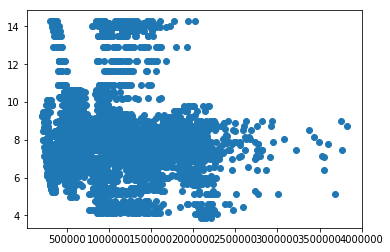

In [141]:
x=walmart_data.Weekly_Sales
y=walmart_data.Unemployment
plt.scatter(x,y)


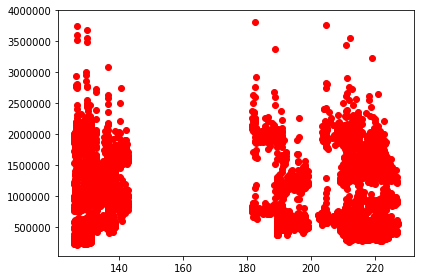

In [22]:
y=walmart_data.Weekly_Sales
x=walmart_data.CPI
plt.scatter(x,y,c='r')
plt.tight_layout()

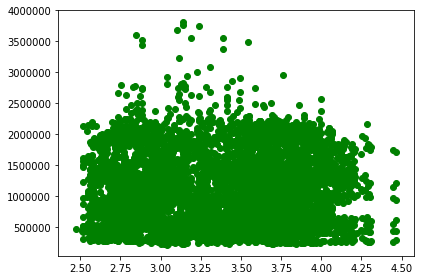

In [23]:
x=walmart_data.Fuel_Price
y=walmart_data.Weekly_Sales
plt.scatter(x,y,c='g')
plt.tight_layout()

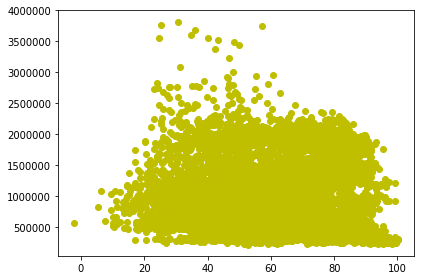

In [24]:
x=walmart_data.Temperature
y=walmart_data.Weekly_Sales
plt.scatter(x,y,c='y')
plt.tight_layout()

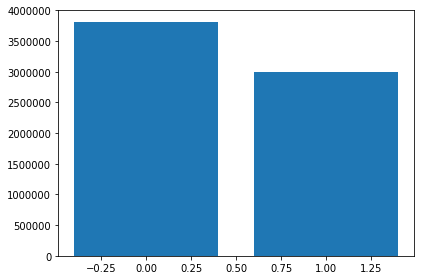

In [73]:
#holiday shopping mainly before the holiday week.
x=walmart_data.Holiday_Flag
y=walmart_data.Weekly_Sales
plt.bar(x,y)
plt.tight_layout()

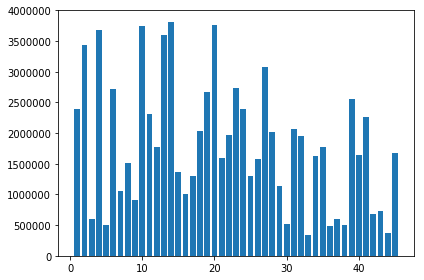

In [74]:
#location is important for high weekly sales
x=walmart_data.Store
y=walmart_data.Weekly_Sales
plt.bar(x,y)
plt.tight_layout()

In [15]:
#Top 20 sales
df_top_20_sales=walmart_data[['Weekly_Sales','Store','Date','CPI','Fuel_Price','Unemployment']].sort_values(by='Weekly_Sales',ascending=False).head(20)
df_top_20_sales

,Weekly_Sales,Store,Date,CPI,Fuel_Price,Unemployment
1905,3818686.45,14,2010-12-24,182.544590,3.141,8.724
2763,3766687.43,20,2010-12-24,204.637673,3.141,7.484
1333,3749057.69,10,2010-12-24,126.983581,3.236,9.003
527,3676388.98,4,2011-12-23,129.984548,3.103,5.143
1762,3595903.20,13,2010-12-24,126.983581,2.846,7.795
1814,3556766.03,13,2011-12-23,129.984548,3.186,6.392
2815,3555371.03,20,2011-12-23,212.236040,3.389,7.082
475,3526713.39,4,2010-12-24,126.983581,2.887,7.127
1385,3487986.89,10,2011-12-23,129.984548,3.541,7.874
189,3436007.68,2,2010-12-24,211.064660,2.886,8.163


In [16]:
std_max_sale=walmart_data.groupby('Store').std()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False).head(1)
std_max_sale

,Weekly_Sales
Store,
14,317569.949476


In [17]:
#Walmart location wise sales mean and standard deviation in sales.

result = walmart_data.groupby('Store').agg({'Weekly_Sales':['mean','std']})
result

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745
6      1.564728e+06  212525.855862
7      5.706173e+05  112585.469220
8      9.087495e+05  106280.829881
9      5.439806e+05   69028.666585
10     1.899425e+06  302262.062504
11     1.356383e+06  165833.887863
12     1.009002e+06  139166.871880
13     2.003620e+06  265506.995776
14     2.020978e+06  317569.949476
15     6.233125e+05  120538.652043
16     5.192477e+05   85769.680133
17     8.935814e+05  112162.936087
18     1.084718e+06  176641.510839
19     1.444999e+06  191722.638730
20     2.107677e+06  275900.562742
21     7.560691e+05  128752.812853
22     1.028501e+06  161251.350631
23     1.389864e+06  249788.038068
24     1.356755e+06  167745.677567
25     7.067215e+05  112976.788600
26     1.002912e+06  110431.288141
27     1.775216e+06  239930.135688
28     1.323522e+06  181758.967539
29     5.394514e+05   99120.136596
30     4.385796e+05   22809.665590
31     1.395901e+06  125855.942933
32     1.166568e+06  138017.252087
33     2.598617e+05   24132.927322
34     9.667816e+05  104630.164676
35     9.197250e+05  211243.457791
36     3.735120e+05   60725.173579
37     5.189003e+05   21837.461190
38     3.857317e+05   42768.169450
39     1.450668e+06  217466.454833
40     9.641280e+05  119002.112858
41     1.268125e+06  187907.162766
42     5.564039e+05   50262.925530
43     6.333247e+05   40598.413260
44     3.027489e+05   24762.832015
45     7.859814e+05  130168.526635

In [18]:
# total Date duration of the dataset
print(walmart_data.Date.max())
print(walmart_data.Date.min())

2012-12-10 00:00:00
2010-01-10 00:00:00


In [19]:
#2012 Quarter 3 sales

start2012='2012-07-1'
end2012='2012-9-30'
df_quarterly_after=walmart_data[walmart_data.Date.between(start2012,end2012)]

In [20]:
quar3_2012_after=df_quarterly_after.groupby('Store').sum()[['Weekly_Sales']]
quar3_2012_after.head()

,Weekly_Sales
Store,
1,18633209.98
2,22396867.61
3,4966495.93
4,25652119.35
5,3880621.88


In [21]:
#2012 quarter 2 sales

startq2='2012-04-1'
endq2='2012-06-30'
quar2_2012=walmart_data[walmart_data.Date.between(startq2,endq2)]

In [22]:
quar2_2012_before=quar2_2012.groupby('Store').sum()[['Weekly_Sales']]
quar2_2012_before.head()

,Weekly_Sales
Store,
1,21036965.58
2,25085123.61
3,5562668.16
4,28384185.16
5,4427262.21


In [23]:
#2012 Quarter 1 sales

startq1='2012-01-01'
endq1='2012-03-30'
quar1_2012=walmart_data[walmart_data.Date.between(startq1,endq1)]
quar1_2012_before=quar1_2012.groupby('Store').sum()[['Weekly_Sales']]
quar1_2012_before.head()

,Weekly_Sales
Store,
1,18951097.69
2,22543946.63
3,4957435.81
4,25659307.85
5,3912829.61


In [24]:
#2012 Quarter 4 sales

startq4='2012-10-01'
endq4='2012-12-30'
quar4_2012=walmart_data[walmart_data.Date.between(startq4,endq4)]
quar4_2012_before=quar4_2012.groupby('Store').sum()[['Weekly_Sales']]
quar4_2012_before.head()

,Weekly_Sales
Store,
1,9580784.77
2,11470757.52
3,2537839.60
4,13075576.88
5,1948124.43


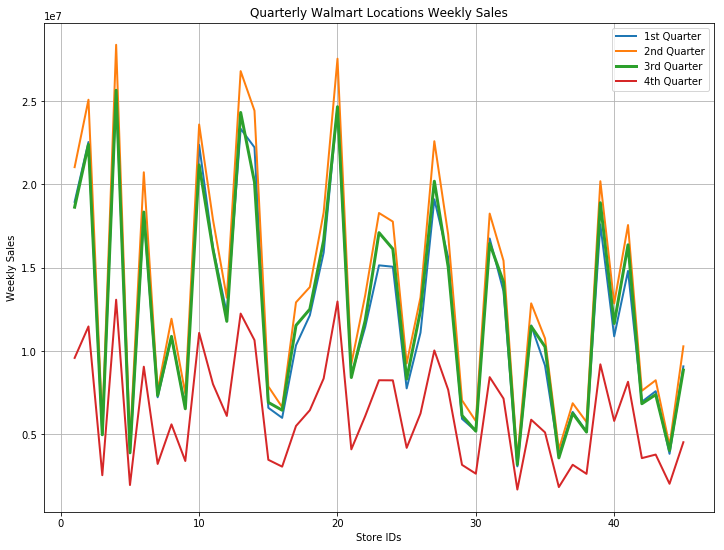

In [96]:
#Creating 2012 quarterly sales results for each Walmart locations
'Locations that require more inventories and human resources'

fig,ax=plt.subplots(figsize=(12,9))
x=range(1,46)
ax.plot(x,quar1_2012_before,linewidth=2.0,label='1st Quarter')
ax.plot(x,quar2_2012_before,linewidth=2.0,label='2nd Quarter')
ax.plot(x,quar3_2012_after,linewidth=3.0,label='3rd Quarter')
ax.plot(x,quar4_2012_before,linewidth=2.0,label='4th Quarter')
ax.set_xlabel('Store IDs')
ax.set_ylabel('Weekly Sales')
ax.legend()
plt.grid()
ax.set_title("Quarterly Walmart Locations Weekly Sales")
plt.show()

In [27]:
# Sales of walmart in holiday weeks [2011,2010 thanksgivings top]
mask_holiday=(walmart_data['Holiday_Flag']==1)
df_holiday_week_sales=walmart_data[mask_holiday]
df_holiday=df_holiday_week_sales.groupby('Date').sum()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending =False).head(10)
df_holiday

,Weekly_Sales
Date,
2011-11-25,66593605.26
2010-11-26,65821003.24
2012-10-02,50009407.92
2010-12-02,48336677.63
2012-07-09,48330059.31
2011-11-02,47336192.79
2011-09-09,46763227.53
2011-12-30,46042461.04
2010-10-09,45634397.84


In [29]:
# Max sales of walmart locations in non_holiday weeks per Week
mask_non_holiday=(walmart_data['Holiday_Flag']==0)
df_non_holiday_week_sales=walmart_data[mask_non_holiday]
df_non_holiday=df_non_holiday_week_sales.groupby('Date').sum()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending =False).head(10)
df_non_holiday

,Weekly_Sales
Date,
2010-12-24,80931415.60
2011-12-23,76998241.31
2010-12-17,61820799.85
2011-12-16,60085695.94
2010-10-12,55666770.39
2011-09-12,55561147.70
2012-06-04,53502315.87
2012-06-07,51253021.88
2010-02-04,50423831.26


In [30]:
#Weekly sale average for non_holiday weeks for all walmart locations
mean_sale_non_holiday_week=df_non_holiday.mean()['Weekly_Sales']
mean_sale_non_holiday_week

59644029.676

In [31]:
# 2011 and 2010 THANKSGIVING holiday week sale for all stores are more than average non_holiday week_sales of all three years for all stores
mask_hol_better=df_holiday.Weekly_Sales> mean_sale_non_holiday_week
better_holidays=df_holiday[mask_hol_better]
better_holidays

,Weekly_Sales
Date,
2011-11-25,66593605.26
2010-11-26,65821003.24


In [32]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


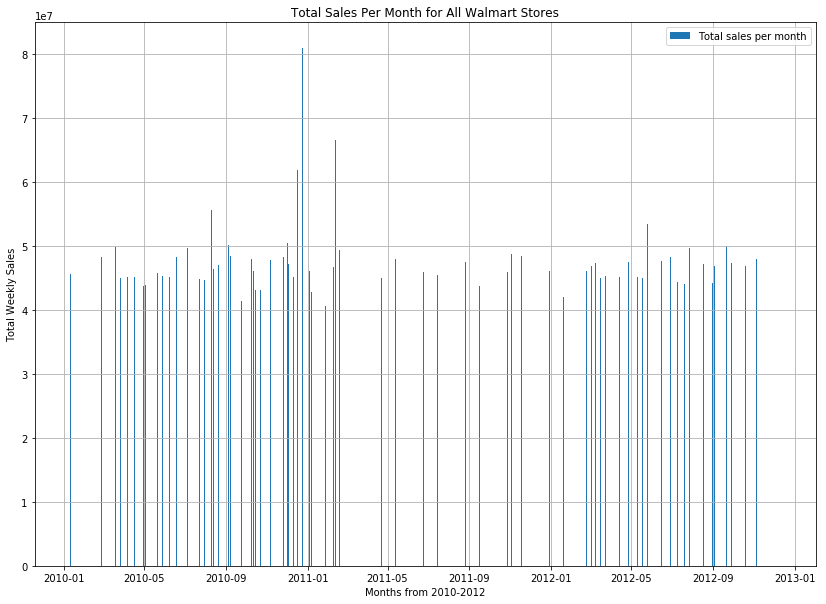

In [33]:
fig,ax=plt.subplots(figsize=(14,10))
sales_monthly_Y=walmart_data.groupby('Date').sum()['Weekly_Sales']
Date_months_x=walmart_data['Date'].unique()
ax.bar(Date_months_x,sales_monthly_Y,label='Total sales per month')
ax.set_xlabel('Months from 2010-2012')
ax.set_ylabel('Total Weekly Sales')
ax.legend()
plt.grid()
ax.set_title("Total Sales Per Month for All Walmart Stores")
plt.show()

In [53]:
#working on semester sales
start1='2010-01-01'
end1='2010-06-30'
start2='2010-07-01'
end2='2010-12-30'
start3='2011-01-01'
end3='2011-06-30'
start4='2011-07-01'
end4='2011-12-30'
start5='2012-01-01'
end5='2012-06-30'
start6='2012-07-01'
end6='2012-12-30'



'''
x=pd.date_range(start='2009-12-30',end='2012-12-30', freq='6M')
sem_x=pd.to_datetime(x, utc=False)
sem_x
'''

"\nx=pd.date_range(start='2009-12-30',end='2012-12-30', freq='6M')\nsem_x=pd.to_datetime(x, utc=False)\nsem_x\n"

In [86]:
sem1=walmart_data[walmart_data.Date.between(start1,end1)]
sem1_data=sem1.groupby('Store').sum()[['Weekly_Sales']]
sem1_data.shape
sem2=walmart_data[walmart_data.Date.between(start2,end2)]
sem2_data=sem2.groupby('Store').sum()[['Weekly_Sales']]
sem2_data.shape
sem3=walmart_data[walmart_data.Date.between(start3,end3)]
sem3_data=sem3.groupby('Store').sum()[['Weekly_Sales']]
sem3_data.shape
sem4=walmart_data[walmart_data.Date.between(start4,end4)]
sem4_data=sem4.groupby('Store').sum()[['Weekly_Sales']]
sem4_data.shape
sem5=walmart_data[walmart_data.Date.between(start5,end5)]
sem5_data=sem5.groupby('Store').sum()[['Weekly_Sales']]
sem5_data.shape
sem6=walmart_data[walmart_data.Date.between(start6,end6)]
sem6_data=sem6.groupby('Store').sum()[['Weekly_Sales']]
sem6_data.shape

(45, 1)

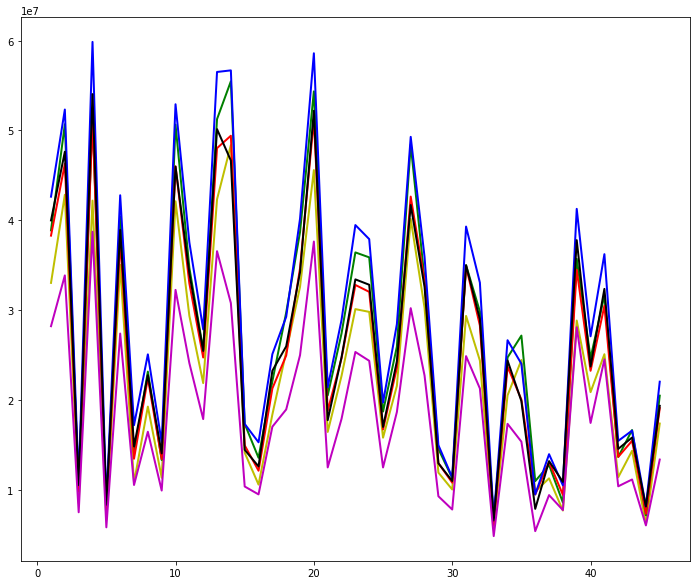

In [87]:
x=range(1,46)
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(x,sem1_data,c='y',linewidth=2.0)
ax.plot(x,sem2_data,c='g',linewidth=2.0)
ax.plot(x,sem3_data,c='r',linewidth=2.0)
ax.plot(x,sem4_data,c='b',linewidth=2.0)
ax.plot(x,sem5_data,c='k',linewidth=2.0)
ax.plot(x,sem6_data,c='m',linewidth=2.0)

In [101]:
sem1=walmart_data[walmart_data.Date.between(start1,end1)]
sem1_mean=sem1.Weekly_Sales.sum()
print(sem1_mean)
sem2=walmart_data[walmart_data.Date.between(start2,end2)]
sem2_mean=sem2.Weekly_Sales.sum()
print(sem2_mean)
sem3=walmart_data[walmart_data.Date.between(start3,end3)]
sem3_mean=sem3.Weekly_Sales.sum()
print(sem3_mean)
sem4=walmart_data[walmart_data.Date.between(start4,end4)]
sem4_mean=sem4.Weekly_Sales.sum()
print(sem4_mean)
sem5=walmart_data[walmart_data.Date.between(start5,end5)]
sem5_mean=sem5.Weekly_Sales.sum()
print(sem5_mean)
sem6=walmart_data[walmart_data.Date.between(start6,end6)]
sem6_mean=sem6.Weekly_Sales.sum()
print(sem6_mean)
list_sem_sales=[sem1_mean,sem2_mean,sem3_mean,sem4_mean,sem5_mean,sem6_mean]
x=walmart_data.Date.between(start1,end6)
ax.bar(x,sem1_mean)
ax.bar(x,sem2_mean)
ax.bar(x,sem3_mean)
ax.bar(x,sem4_mean)
ax.bar(x,sem5_mean)
ax.bar(x,sem6_mean)
plt.show()

1026912732.34
1221540869.0700002
1138060006.42
1310140000.9299998
1163004064.33
837128795.02


In [91]:
# working on HYPOTHESIS ANALYSIS
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
fuel_price_sort=walmart_data[['Fuel_Price','Weekly_Sales']].sort_values(by ='Fuel_Price',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
mask1=fuel_price_sort.Fuel_Price>=3.5
mask2=fuel_price_sort.Fuel_Price<3.5
fuel_4above_sales=fuel_price_sort[mask1]
fuel_4above_sales
fuel_4below_sales=fuel_price_sort[mask2]
fuel_4below_sales.Weekly_Sales

4513    1221318.17
5800    1412959.97
938      645156.21
2225     554630.42
5088     352960.64
5807    1277882.77
945      525866.36
4520    1149448.02
2232     482926.93
487     2116475.38
4777    1014218.80
1132     930745.69
1561    1388973.65
5279     500964.59
131     1592409.97
703      306759.70
1275     538713.47
5147     272489.41
4278     430878.28
2991     700272.01
846     1588380.73
5565    1641867.92
6137     643558.78
274     1866719.96
4421    1386472.59
417      391811.60
4825    1123446.51
535     2427640.17
2811    2906233.25
6386    1170672.94
           ...    
4148     497374.57
2861     809321.44
716     1606283.86
5435    1266229.07
1145     552677.48
144     2137809.50
1       1641957.44
5005     467546.74
5029     452021.20
4721     983963.07
431     2049860.26
5006     469563.70
5035     431294.45
5008     447519.44
6008     658997.55
2862     867283.25
2       1611968.17
4292    1473386.75
145     2124451.54
4149     463513.26
1146     511327.90
5436    1230

In [7]:
mean_sale_fuel_4above=fuel_4above_sales.Weekly_Sales.mean()
std_sale_fuel_4above=fuel_4above_sales.Weekly_Sales.std()
print(mean_sale_fuel_4above)
print(std_sale_fuel_4above)

1042901.0535259132
535699.4567120502


In [8]:
mean_sale_fuel_4below=fuel_4below_sales.Weekly_Sales.mean()
std_sale_fuel_4below=fuel_4below_sales.Weekly_Sales.std()
print(mean_sale_fuel_4below)
print(std_sale_fuel_4below)

1050578.8890135065
588744.1038000692


In [9]:
'''
H0: Null Hypothesis : there is no impact of Fuel price on sales
H1: Alternate Hypothesis: there is an impact of Fuel price on sales
alpha: 0.05 '''

'\nH0: Null Hypothesis : there is no impact of Fuel price on sales\nH1: Alternate Hypothesis: there is an impact of Fuel price on sales\nalpha: 0.05 '

In [9]:
#applying t_test
data1=np.array(fuel_4above_sales.Weekly_Sales)
data2=np.array(fuel_4below_sales.Weekly_Sales)
from scipy.stats import ttest_ind

In [10]:
# compare samples
#2.8 is the critical point
#reject null hypothesis for 2.6,2.7,2.8
#fail to reject null hypothesis for 2.9,3.0,3.1
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=-0.545, p=0.586


In [ ]:
#plot a graph showing sales for fuel price below 2.8 and above 2.8
fig,ax=plt.subplots(figsize=(12,6))
yaxis=fuel_4above_sales[['Weekly_Sales']]
z=fuel_4below_sales[['Weekly_Sales']]
x=range(int(yaxis.min()),int(yaxis.max()))
ax.bar(x,yaxis)

In [86]:
unemploy_sort=walmart_data[['Unemployment','Weekly_Sales']].sort_values(by ='Unemployment',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
mask1=unemploy_sort.Unemployment>=4.5
mask2=unemploy_sort.Unemployment<4.5
high_unemploy_sale=unemploy_sort[mask1]
high_unemploy_sale
low_unemploy_sale=unemploy_sort[mask2]
low_unemploy_sale

,Unemployment,Weekly_Sales
5664,4.420,1070389.98
5666,4.420,942319.65
5667,4.420,941675.95
5668,4.420,1011321.18
5669,4.420,1037687.07
5670,4.420,905399.99
5671,4.420,1230011.95
5673,4.420,1158708.98
5674,4.420,1198670.19
5675,4.420,1601585.70


In [83]:
print(walmart_data.Unemployment.max())
print(walmart_data.Unemployment.min())

14.312999999999999
3.8789999999999996


In [87]:
mean_sale_high_employ=high_unemploy_sale.Weekly_Sales.mean()
std_sale_high_employ=high_unemploy_sale.Weekly_Sales.std()
print(mean_sale_high_employ)
print(std_sale_high_employ)

1038809.4668441107
563594.0610654072


In [88]:
mean_sale_low_employ=low_unemploy_sale.Weekly_Sales.mean()
std_sale_low_employ=low_unemploy_sale.Weekly_Sales.std()
print(mean_sale_low_employ)
print(std_sale_low_employ)

1408387.4102816903
474482.6279616408


In [89]:
#applying t_test
data1=np.array(high_unemploy_sale.Weekly_Sales)
data2=np.array(low_unemploy_sale.Weekly_Sales)
from scipy.stats import ttest_ind

In [144]:
unemploy_sort=walmart_data[['Unemployment','Weekly_Sales']].sort_values(by ='Unemployment',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
#14.18 is the critical point
mask1=unemploy_sort.Unemployment>=14.18
mask2=unemploy_sort.Unemployment<14.18
high_unemploy_sale=unemploy_sort[mask1]
high_unemploy_sale
low_unemploy_sale=unemploy_sort[mask2]
low_unemploy_sale
#applying t_test
data1=np.array(high_unemploy_sale.Weekly_Sales)
data2=np.array(low_unemploy_sale.Weekly_Sales)
from scipy.stats import ttest_ind
# compare samples
#reject null hypothesis for 2.6,2.7,2.8
#fail to reject null hypothesis for 2.9,3.0,3.1
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=-2.452, p=0.014


In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
yaxis=fuel_4above_sales[['Weekly_Sales']].sum()
z=fuel_4below_sales[['Weekly_Sales']].mean()
labels=['Fuel above 2.8','Fuel below 2.8']
ax.set_xticklabels(labels, fontsize=10)
ax.bar(labels,yaxis)


In [136]:
cpi_sort=walmart_data[['CPI','Weekly_Sales']].sort_values(by ='CPI',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
#226.55 is the critical point
mask1=cpi_sort.CPI>=226.55
mask2=cpi_sort.CPI<226.55
high_cpi_sale=cpi_sort[mask1]
high_cpi_sale
low_cpi_sale=cpi_sort[mask2]
low_cpi_sale
#applying t_test
data1=np.array(high_cpi_sale.Weekly_Sales)
data2=np.array(low_cpi_sale.Weekly_Sales)
from scipy.stats import ttest_ind
# compare samples
#reject null hypothesis for 2.6,2.7,2.8
#fail to reject null hypothesis for 2.9,3.0,3.1
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=-2.098, p=0.036


In [137]:
walmart_data.CPI.max()

227.2328068

In [138]:
walmart_data.CPI.min()

126.064

In [226]:
import datetime as dt
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])
walmart_data['Date']=walmart_data['Date'].map(dt.datetime.toordinal)
x_features=walmart_data[['Date']]
type(x_features)

pandas.core.frame.DataFrame

In [227]:
y_target=walmart_data[['Weekly_Sales']]
y_target.head()

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [218]:
x_features.shape

(6435, 1)

In [219]:
y_target.shape

(6435, 1)

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_target,random_state=30)

In [221]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4826, 1) (1609, 1) (4826, 1) (1609, 1)


In [222]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [223]:
print(linreg.intercept_)
print(linreg.coef_)

[1046844.25660174]
[[0.]]


In [228]:
y_pred=linreg.predict(x_test)
y_pred

array([[1046844.25660174],
       [1046844.25660174],
       [1046844.25660174],
       ...,
       [1046844.25660174],
       [1046844.25660174],
       [1046844.25660174]])

In [229]:
from sklearn import metrics
import numpy as np

In [230]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

552576.5425448267
